# Linear Regression

**Linear Regression** is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal of linear tip is to find a linear equation that best predicts the dependent variable from the independent variables.

## Formula

The equation for a linear regression line is:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon
$$

where:
-  𝑦  is the dependent variable,
-  𝛽_0, 𝛽_1, 𝛽_2, ..., 𝛽_n  are the coefficients,
- 𝑋_1, 𝑋_2, ..., 𝑋_n are the independent variables,
- 𝜖 is the error term, which accounts for the variability in 𝑦 not explained by the independent variables.

## Assumptions

Linear regression assumes:
1. **Linearity:** The relationship between the predictors and the response is linear.
2. **No multicollinearity:** Predictors are not perfectly collinear or highly correlated.
3. **Homoscedasticity:** The variance of residual is the same for any value of the predictors.
4. **Independence:** Observations are independent of each other.
5. **Normality:** For any fixed value of X, Y is normally distributed.

## Types

There are two main types of linear regression:
- **Simple Linear Regression:** Only one independent variable is used to predict the dependent variable. It models the relationship between the dependent variable and one independent variable using a linear equation.
- **Multiple Linear Regression:** More than one independent variable is used to predict the dependent variable.

## Applications

Linear regression is widely used in various fields including economics, biology, engineering, and social sciences to:
- Predict outcomes,
- Determine strength of predictors,
- Forecast future trends,
- Model relationships.

## Example

Here's a simple example of a linear regression model predicting house prices based on their square footage. The equation might look like:

$$
\text{Price} = \beta_0 + \beta_1 \times \text{Square Footage}
$$

This model will help us understand how house price changes with a change in size of the house.


![alt text](LR.jfif "Title")

# Implementation

## Uploading the data

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import io
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Global variable to store the DataFrame
data = None

# Create an output widget
output = widgets.Output()

# Function to handle the upload and convert to DataFrame
def on_upload_change(change):
    global data
    if not change.new:
        return  # no file uploaded yet

    uploader = change.owner
    
    with output:
        # Clear previous outputs
        clear_output()
        
        # Print the structure of uploader.value to debug
        #print(type(uploader.value), uploader.value)

        if isinstance(uploader.value, tuple):
            # Handle the case where uploader.value is a tuple
            uploaded_file = uploader.value[0]
        elif isinstance(uploader.value, dict):
            # Handle the typical case where uploader.value is a dict
            uploaded_file = list(uploader.value.values())[0]
        else:
            print("Unexpected value structure:", uploader.value)
            return

        content = uploaded_file['content']
        data = pd.read_csv(io.BytesIO(content))
        display(data.head())  # Show the first few rows to confirm it's loaded

# Create file upload button
uploader = widgets.FileUpload(
    accept='.csv',  # accept only .csv files
    multiple=False  # allow uploading only one file at a time
)

# Watch for changes on the upload button
uploader.observe(on_upload_change, names='value')

# Display the upload button and output widget
display(uploader, output)


FileUpload(value=(), accept='.csv', description='Upload')

Output()

## Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df = data.copy()

# Widgets for selecting operations and methods
fill_method_dropdown = widgets.Dropdown(
    options=[('None', None), ('Zero', 'zero'), ('Mean', 'mean'), ('Median', 'median')],
    value=None,
    description='Fill Method:',
)

remove_nulls_checkbox = widgets.Checkbox(value=False, description='Remove Nulls')
encode_categorical_checkbox = widgets.Checkbox(value=False, description='Encode Categorical')
normalize_data_checkbox = widgets.Checkbox(value=False, description='Normalize Data')

# Button to apply selected operations
apply_button = widgets.Button(description='Apply All', button_style='info')

# Button to display data
show_data_button = widgets.Button(description='Show Data')

# Output area
output = widgets.Output()

def apply_operations():
    global data
    with output:
        output.clear_output()
        # Fill missing values based on selected method
        if fill_method_dropdown.value:
            if fill_method_dropdown.value == 'zero':
                data = data.fillna(0)
            elif fill_method_dropdown.value in ['mean', 'median']:
                # Apply fill method only to numeric columns
                numeric_cols = data.select_dtypes(include=np.number).columns
                for column in numeric_cols:
                    if data[column].sum() != 0:
                        if fill_method_dropdown.value == 'mean':
                            mean_value = data[column].mean()
                            data[column] = data[column].fillna(mean_value)
                        elif fill_method_dropdown.value == 'median':
                            median_value = data[column].median()
                            data[column] = data[column].fillna(median_value)
            print(f"Missing values filled with {fill_method_dropdown.value}.")

        if remove_nulls_checkbox.value:
            data = data.dropna()  # Remove remaining null values
            print("Remaining null values removed.")
        if encode_categorical_checkbox.value:
            # Apply label encoding to categorical columns
            label_encoder = LabelEncoder()
            categorical_cols = data.select_dtypes(include=['object', 'category']).columns
            for col in categorical_cols:
                data[col] = label_encoder.fit_transform(data[col].astype(str))
            print("Categorical data encoded using label encoding.")
        if normalize_data_checkbox.value:
            # Normalize numeric columns using MinMaxScaler
            scaler = MinMaxScaler()
            numeric_cols = data.select_dtypes(include=np.number).columns
            data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
            print("Data normalized.")

def show_data(b):
    with output:
        output.clear_output()
        display(data.head())  # Show the head of the DataFrame

apply_button.on_click(lambda b: apply_operations())
show_data_button.on_click(show_data)

# Layout the widgets
widgets.VBox([
    widgets.Label('Select Fill Method and Operations:'),
    fill_method_dropdown,
    remove_nulls_checkbox,
    encode_categorical_checkbox,
    normalize_data_checkbox,
    apply_button,
    show_data_button,
    output
])


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Sample DataFrame loading
# data = pd.read_csv('your_data.csv')  # Uncomment this and replace with your DataFrame

# Output widget to display the plots
output_widget = widgets.Output()

def display_heatmap():
    with output_widget:
        output_widget.clear_output(wait=True)
        # Display heatmap only for numeric columns
        numeric_cols = data.select_dtypes(include=['int64', 'float64', 'float32'])
        if not numeric_cols.empty:
            plt.figure(figsize=(5, 4))
            sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='Blues')
            plt.title('Heatmap of Numeric Features')
            plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
            plt.yticks(rotation=0)  # Ensure y labels are readable
            plt.tight_layout()  # Adjust layout to fit all elements
            plt.show()

# Create a dropdown to select the column
column_selector = widgets.Select(
    options=['Heatmap'] + list(data.columns),
    description='Select:',
    style={'description_width': 'initial'},
    layout={'width': '300px'}
)

def on_column_selected(change):
    column = change['new']
    if column == 'Heatmap':
        display_heatmap()
    else:
        with output_widget:
            output_widget.clear_output(wait=True)
            if pd.api.types.is_numeric_dtype(df[column]):
                # Numeric column: plot distribution
                plt.figure(figsize=(5, 3))
                sns.histplot(df[column], kde=True, color='skyblue')
                plt.title(f'Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.grid(True)
                plt.show()
            else:
                # Categorical column: plot pie chart
                pie_data = df[column].value_counts()
                plt.figure(figsize=(4, 4))
                plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
                plt.title(f'Distribution of {column}')
                plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
                plt.show()

# Watch for changes in the dropdown
column_selector.observe(on_column_selected, names='value')

# Initial display
display(column_selector, output_widget)
display_heatmap()  # Display the heatmap by default when the notebook is run

Select(description='Select:', layout=Layout(width='300px'), options=('Heatmap', 'Age', 'Gender', 'Education Le…

Output()

## Model Implementation

### Splitting into Training and Testing

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display

# Sample DataFrame loading (replace this with your actual DataFrame)
# data = pd.read_csv('your_data.csv')  # Uncomment this and replace with your DataFrame

# Slider for selecting the train-test split percentage
split_slider = widgets.FloatSlider(
    value=0.7,
    min=0.1,
    max=0.9,
    step=0.1,
    description='Train/Test Split:',
    readout_format='.1f',
    style={'description_width': 'initial'}
)

# Button to apply the changes and perform the split
apply_button = widgets.Button(
    description='Apply Changes',
    button_style='info',
    tooltip='Click to apply train-test split'
)

# Output widget for any textual output or errors
output = widgets.Output()

def apply_split(b):
    global X_train, X_test, y_train, y_test
    with output:
        output.clear_output()
        # Splitting the dataset
        try:
            # Assign the last column as the target and the rest as features
            X = data.iloc[:, :-1]
            y = data.iloc[:, -1]
            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=1 - split_slider.value, random_state=42
            )
            print(f"Data split into {split_slider.value*100}% training and {100 - split_slider.value*100}% testing.")
            # Optional: Output shapes of the splits
            print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
            print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")
        except Exception as e:
            print(f"An error occurred: {e}")

apply_button.on_click(apply_split)

# Display the widgets
display(split_slider, apply_button, output)

FloatSlider(value=0.7, description='Train/Test Split:', max=0.9, min=0.1, readout_format='.1f', style=SliderSt…

Button(button_style='info', description='Apply Changes', style=ButtonStyle(), tooltip='Click to apply train-te…

Output()

### Data Inference

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display

# Assume data is loaded as before and split into X_train, X_test, y_train, y_test

# Widgets for Linear Regression hyperparameters
fit_intercept_toggle = widgets.ToggleButton(
    value=True,
    description='Fit Intercept',
    tooltip='Toggle whether to calculate the intercept for this model'
)

# Button to train the model and make predictions
train_button = widgets.Button(
    description='Train and Predict',
    button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to train the model and predict'
)

# Output widget for results
output = widgets.Output()

def train_and_predict(b):
    global y_pred
    with output:
        output.clear_output()
        try:
            # Model initialization
            model = LinearRegression(fit_intercept=fit_intercept_toggle.value)
            
            # Data scaling (optional, uncomment if normalization is needed)
            # scaler = StandardScaler()
            # X_train_scaled = scaler.fit_transform(X_train)
            # X_test_scaled = scaler.transform(X_test)
            # Use X_train_scaled and X_test_scaled for training and predictions
            
            # Training the model
            model.fit(X_train, y_train)  # Replace X_train with X_train_scaled if using StandardScaler
            
            # Making predictions
            y_pred = model.predict(X_test)  # Replace X_test with X_test_scaled if using StandardScaler
            
            # Evaluating the model
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            print(f'Model trained with fit_intercept={fit_intercept_toggle.value}')
            print(f'Mean Squared Error: {mse}')
            print(f'R2 Score: {r2}')
        except Exception as e:
            print(f"An error occurred: {e}")

train_button.on_click(train_and_predict)

# Display the widgets and output
widgets.VBox([fit_intercept_toggle, train_button, output])


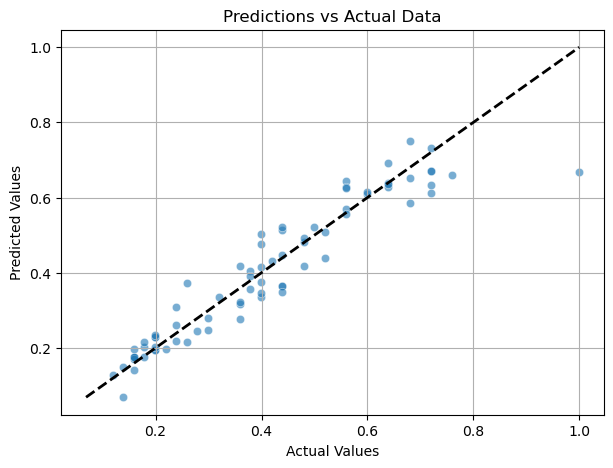

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are available
def plot_predictions_vs_actual(y_test, y_pred):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.title('Predictions vs Actual Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plotting a line of perfect prediction
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect prediction

    plt.grid(True)
    plt.show()

# Call the function with the actual data and predictions
plot_predictions_vs_actual(y_test, y_pred)
